<a href="https://colab.research.google.com/github/aldegundescastro/Bootcamp-Machine-Learning-Training/blob/main/desafio_metricas_de_avalia%C3%A7ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Cálculo de Métricas de Avaliação de Aprendizado

Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score.

In [ ]:
! pip install ucimlrepo

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

In [35]:
# =============================================================================
# Download e Carregamento do Dataset via Biblioteca UCI
# =============================================================================
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

#print("\nFeatures:")
#print(X.head())
#print("\nvariável alvo:")
#print(y.head())



In [31]:
# =============================================================================
# Pré-processamento dos Dados da UCI
# =============================================================================
# Tratar valores ausentes (a biblioteca já os identifica como NaN)
# Vamos usar uma estratégia simples: substituir pela média da coluna
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# No dataset original, 'num' > 0 significa presença de doença.
# Conversão para binário 0 = sem doença, 1 = com doença.
y_binary = (y['num'] > 0).astype(int)

In [32]:
# =============================================================================
# Preparação, Treinamento e Avaliação do Modelo
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
print(f"\nDados divididos em {len(X_train)} amostras de treino e {len(X_test)} de teste.")

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Constroi matriz de confusão
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão gerada pelo scikit-learn:")
print(cm)


Dados divididos em 242 amostras de treino e 61 de teste.

Matriz de Confusão gerada pelo scikit-learn:
[[26  3]
 [ 4 28]]


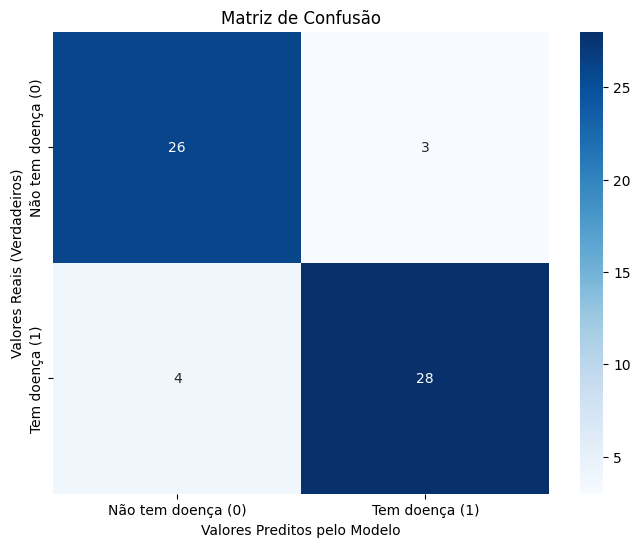

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não tem doença (0)', 'Tem doença (1)'],
            yticklabels=['Não tem doença (0)', 'Tem doença (1)'])
plt.xlabel('Valores Preditos pelo Modelo')
plt.ylabel('Valores Reais (Verdadeiros)')
plt.title('Matriz de Confusão')
plt.show()

In [34]:
# =============================================================================
# Cálculo de Métricas de Avaliação
# =============================================================================
vn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
vp = cm[1, 1]

precisao =        vp / (vp + fp)
sensibilidade =   vp / (vp + fn)
especificidade =  vn / (fp + vn)
acuracia = (vp + vn) / (vp + vn + fp + fn)
f_score = 2*(precisao*sensibilidade)/(precisao+sensibilidade)


print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Sensibilidade: {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"f_score: {especificidade:.2f}")


Acurácia: 0.89
Precisão: 0.90
Sensibilidade: 0.88
Especificidade: 0.90
f_score: 0.90
